In [22]:
# from keras.preprocessing.image import img_to_array,load_img
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np 
import os 
from os import walk
from scipy.misc import imresize 
from skimage import color
from skimage import io
from skimage.io import imread
from skimage.transform import resize
import glob
import PIL

import matplotlib.pyplot as plt
# import Image

In [23]:
import cv2

In [24]:
def calc_mean(fpath, dataset, saveDir = 'savedDatasets', size = (240, 240), sort = True, fileType = 'jpg'):

    print('Calculating mean frame for {}'.format(dataset))
    imageDataset = []

    frames = glob.glob(fpath+'/*.{}'.format(fileType))
        
    frame_sum = np.zeros(size).astype('float64')

    for x,i in zip(frames, range(0,frames.__len__())):
        frame_value = imread(x, as_grey=True)
        frame_value = resize(frame_value, size, mode='reflect')
        assert(0. <= frame_value.all() <= 1.)
        
        imageDataset.append(frame_value)

    imageDataset = np.array(imageDataset)
    assert(0. <= imageDataset.all() <= 1.)
    print('Done')
    return imageDataset

In [25]:
def calc_mean_cv(fpath, dataset, saveDir = 'savedDatasets', size = (240, 240), sort = True, fileType = 'jpg'):

    print('Calculating mean frame for {}'.format(dataset))
    imageDataset = []

    frames = glob.glob(fpath+'/*.{}'.format(fileType))
        
    frame_sum = np.zeros(size).astype('float64')
    imageDataset=np.zeros((frames.__len__(),240,240))
    for x,i in zip(frames, range(0,frames.__len__())):
        
        frame_value=cv2.imread(x,0) #Use this for RGB to GS
        frame_value=cv2.resize(frame_value, size)#resize
#         frame_value=frame_value.reshape(ht,wd,1)
        
#         frame_value = imread(x, as_grey=True)
#         frame_value = resize(frame_value, size, mode='reflect')
# Mean per pixels
        frame_value=frame_value-np.mean(frame_value)#Mean centering
        frame_value = frame_value/np.std(frame_value)
          
#          img=img.astype('float32') / 255. #rescaling
#         assert(0. <= frame_value.all() <= 1.)
        
        imageDataset[i,:,:]=frame_value

#     imageDataset = np.array(imageDataset)
#     assert(0. <= imageDataset.all() <= 1.)
    print('Done')
    return imageDataset

In [26]:
imagesData_cv2 = calc_mean_cv('images/', 'debris')

Calculating mean frame for debris
Done


In [27]:
imagesData = calc_mean('images/', 'debris')

Calculating mean frame for debris
Done


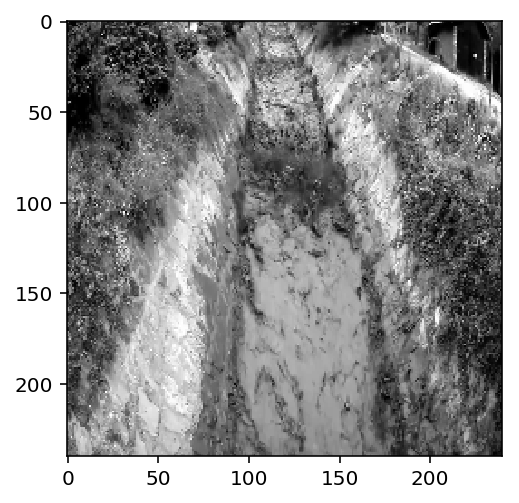

In [28]:
# Visualize an image
plt.imshow(imagesData[80,:,:], cmap='gray')
plt.show()

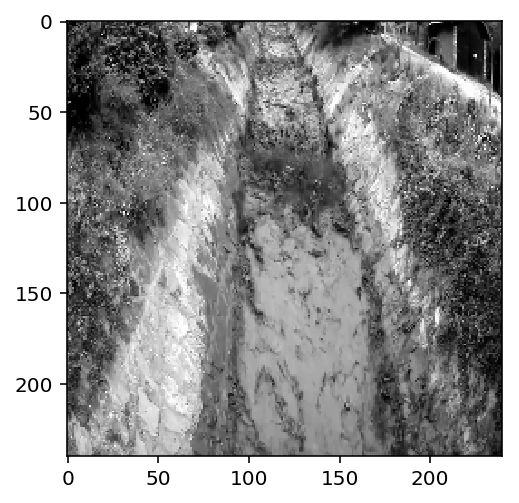

In [29]:
# Visualize an image
plt.imshow(imagesData_cv2[80,:,:], cmap='gray')
plt.show()

In [30]:
print(imagesData.min(), imagesData.max())

0.0 1.0


In [31]:
print(imagesData_cv2.min(), imagesData_cv2.max())

-2.1855418586221393 2.5090055967969387


## Image zero centering

In [32]:
imagesData_zero_centering = imagesData - np.mean(imagesData, axis = 0)

In [33]:
print(imagesData_zero_centering.min(), imagesData_zero_centering.max())

-0.8454974143018242 0.9498286699207855


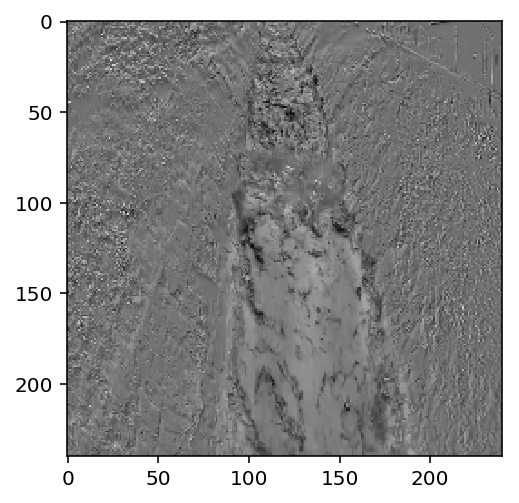

In [34]:
plt.imshow(imagesData_zero_centering[80,:,:], cmap='gray')
plt.show()

## Image values in range [-1, 1]

In [35]:
imagesData_in_a_range = 2 * ((imagesData - np.min(imagesData, axis = 0)) / ((np.max(imagesData, axis = 0)-np.min(imagesData, axis = 0)) + 1e-7)) - 1

In [36]:
print(imagesData_in_a_range.min(), imagesData_in_a_range.max())

-1.0 0.9999998000000201


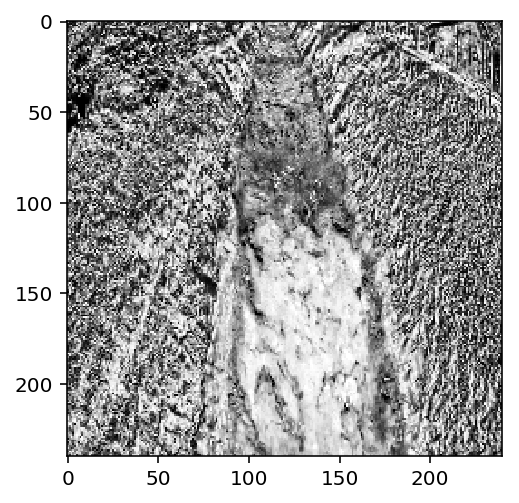

In [37]:
plt.imshow(imagesData_in_a_range[80,:,:], cmap='gray')
plt.show()

## Image standization

In [38]:
imagesData_zero_mean_unit_std = (imagesData - np.mean(imagesData, axis = 0))/(np.std(imagesData, axis = 0)+1e-7)

In [39]:
print(imagesData_zero_mean_unit_std.min(), imagesData_zero_mean_unit_std.max())

-9.799221899204708 12.722069966754345


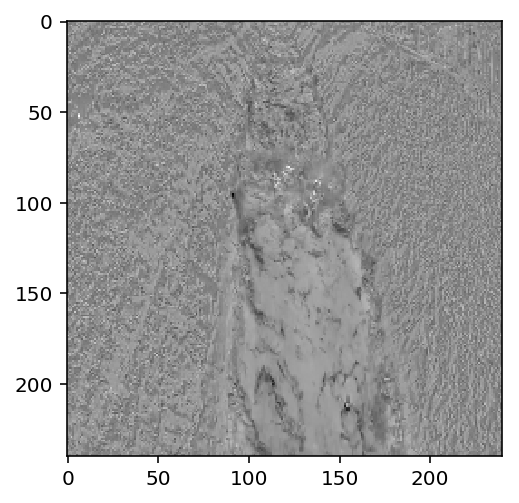

In [40]:
plt.imshow(imagesData_zero_mean_unit_std[80,:,:], cmap='gray')
plt.show()

In [41]:
imagesData_in_a_range_std = 2 * ((imagesData_zero_mean_unit_std - np.min(imagesData_zero_mean_unit_std, axis = 0)) / ((np.max(imagesData_zero_mean_unit_std, axis = 0)-np.min(imagesData_zero_mean_unit_std, axis = 0)) + 1e-7)) - 1

In [42]:
print(imagesData_in_a_range_std.min(), imagesData_in_a_range_std.max())

-1.0 0.9999999851381374


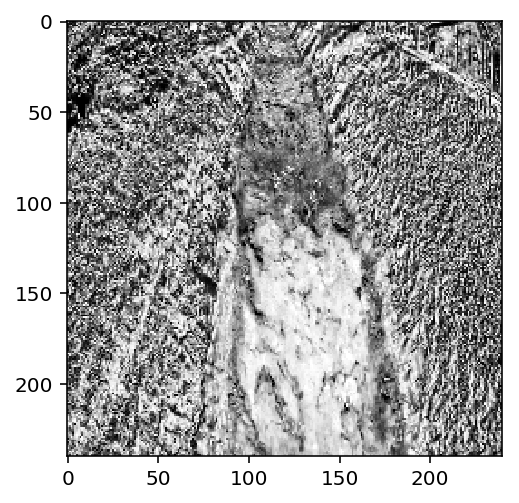

In [43]:
plt.imshow(imagesData_in_a_range_std[80,:,:], cmap='gray')
plt.show()

## ZCA Whitening

In [59]:
X_norm = imagesData[80,:,:]

In [60]:
X_norm = X_norm - X_norm.mean(axis=0)

In [61]:
cov = np.cov(X_norm, rowvar=True)

In [62]:

U,S,V = np.linalg.svd(cov)

In [63]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)

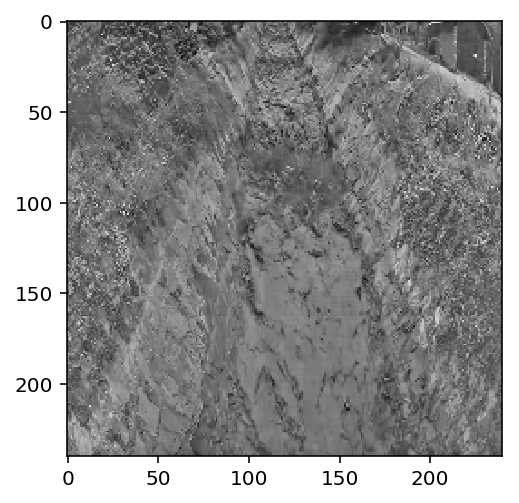

In [64]:
# Visualize an image
plt.imshow(X_ZCA, cmap='gray')
plt.show()

In [24]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

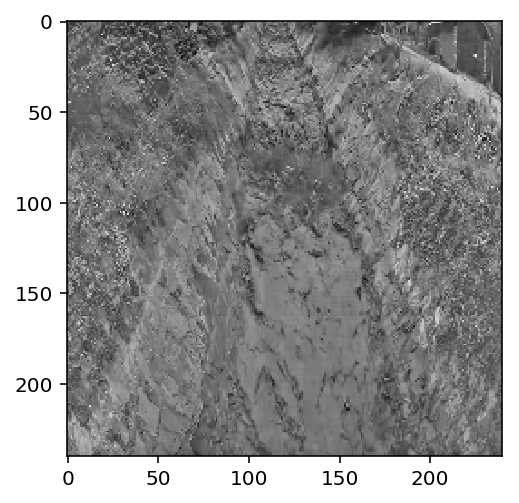

In [25]:
# Visualize an image
plt.imshow(X_ZCA_rescaled, cmap='gray')
plt.show()

In [26]:
print(X_ZCA_rescaled.min(), X_ZCA_rescaled.max())

0.0 1.0


In [27]:
X_ZCA_rescaled_in_a_range = 2 * ((X_ZCA_rescaled - np.min(X_ZCA_rescaled, axis = 0)) / ((np.max(X_ZCA_rescaled, axis = 0)-np.min(X_ZCA_rescaled, axis = 0)) + 1e-7)) - 1

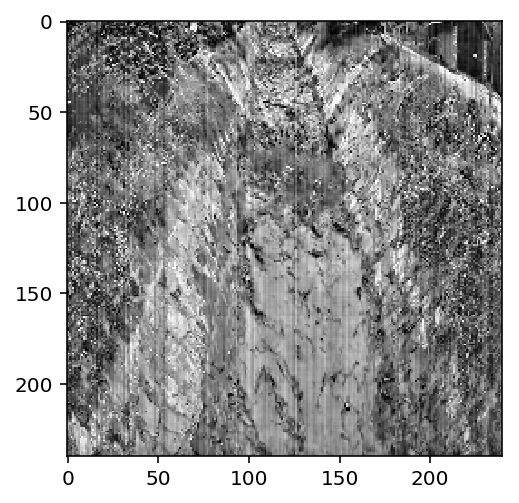

In [28]:
# Visualize an image
plt.imshow(X_ZCA_rescaled_in_a_range, cmap='gray')
plt.show()

In [8]:
def creatImageDataset(fpath, zero_mean = True ,ZCA_whitening = False, epsilon = 0.1, size = (240, 240), sort = True, fileType = 'jpg'):

    imageDataset = []

    frames = glob.glob(fpath+'/*.{}'.format(fileType))
        
    imageDataset=np.zeros((frames.__len__(),size[0],size[1]))

    for x,i in zip(frames, range(0,frames.__len__())):
        frame_value = imread(x, as_grey=True)
        frame_value = resize(frame_value, size, mode='reflect')
        assert(0. <= frame_value.all() <= 1.)
        
        if zero_mean and not ZCA_whitening:
            frame_value = frame_value - frame_value.mean(axis=0)
            assert(-1. <= frame_value.all() <= 1.)
        
        if ZCA_whitening and not zero_mean:
            frame_value = frame_value - frame_value.mean(axis=0)
            cov = np.cov(frame_value, rowvar=True)
            U,S,V = np.linalg.svd(cov)
            frame_value = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(frame_value)
            frame_value = (frame_value - frame_value.min()) / (frame_value.max() - frame_value.min())
            assert(0. <= frame_value.all() <= 1.)
            
        imageDataset[i,:,:]=frame_value
        
    print('Size of Dataset is: {}'.format(imageDataset.shape))
    return imageDataset

In [16]:
testImagesData = creatImageDataset('images/', zero_mean = False ,ZCA_whitening = True, epsilon = 0.1, size = (240, 240), sort = True, fileType = 'jpg')

Size of Dataset is: (237, 240, 240)


In [17]:
print(testImagesData.min(), testImagesData.max())

0.0 1.0


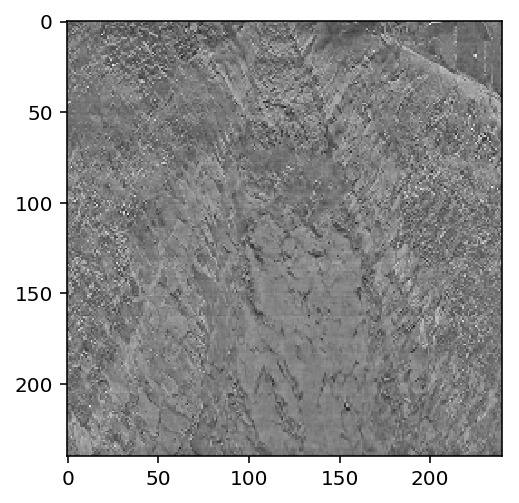

In [12]:
plt.imshow(testImagesData[80,:,:], cmap='gray')
plt.show()

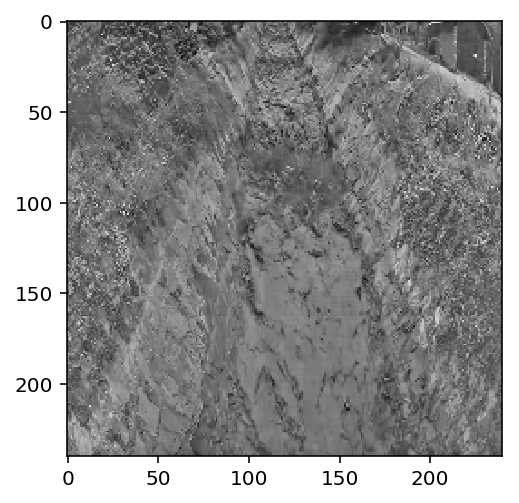

In [18]:
plt.imshow(testImagesData[80,:,:], cmap='gray')
plt.show()

In [19]:
X_ZCA_rescaled_in_a_range = 2 * ((testImagesData - np.min(testImagesData, axis = 0)) / ((np.max(testImagesData, axis = 0)-np.min(testImagesData, axis = 0)) + 1e-7)) - 1

In [20]:
print(X_ZCA_rescaled_in_a_range.min(), X_ZCA_rescaled_in_a_range.max())

-1.0 0.9999997732824855


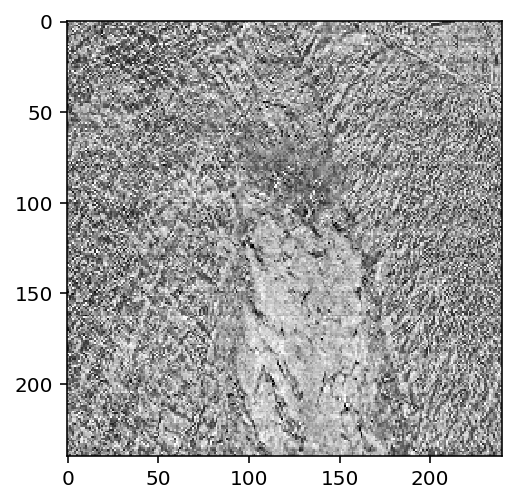

In [14]:
plt.imshow(X_ZCA_rescaled_in_a_range[80,:,:], cmap='gray')
plt.show()

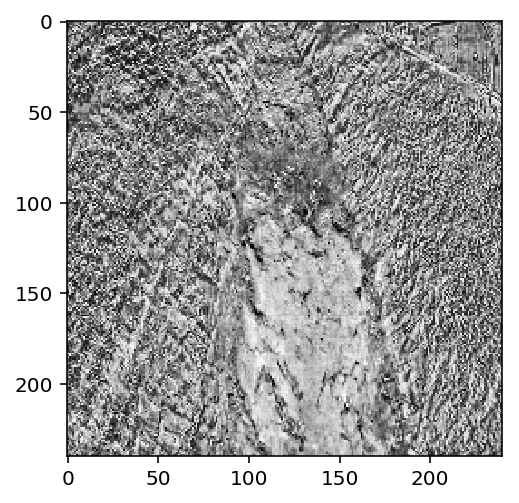

In [21]:
plt.imshow(X_ZCA_rescaled_in_a_range[80,:,:], cmap='gray')
plt.show()

## Mean and Standization over Data Images

In [44]:
# from keras.preprocessing.image import img_to_array,load_img
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np 
import os 
from os import walk
from scipy.misc import imresize 
from skimage import color
from skimage import io
from skimage.io import imread
from skimage.transform import resize
import glob
import PIL
import cv2
import matplotlib.pyplot as plt
# import Image

In [45]:
def calc_mean_cv_2(fpath, dataset, saveDir = 'savedDatasets', size = (240, 240), sort = True, fileType = 'jpg'):

    print('Calculating mean frame for {}'.format(dataset))
    imageDataset = []

    frames = glob.glob(fpath+'/*.{}'.format(fileType))
        
    frame_sum = np.zeros(size).astype('float64')
    imageDataset=np.zeros((frames.__len__(),240,240))
    for x,i in zip(frames, range(0,frames.__len__())):
        
        frame_value=cv2.imread(x,0) #Use this for RGB to GS
        frame_value=cv2.resize(frame_value, size)#resize
#         frame_value=frame_value.reshape(ht,wd,1)
        
#         frame_value = imread(x, as_grey=True)
#         frame_value = resize(frame_value, size, mode='reflect')
# Mean per pixels
#         frame_value=frame_value-np.mean(frame_value)#Mean centering
#         frame_value = frame_value/np.std(frame_value)
          
#          img=img.astype('float32') / 255. #rescaling
        assert(0. <= frame_value.all() <= 1.)
        
        imageDataset[i,:,:]=frame_value

#     imageDataset = np.array(imageDataset)
#     assert(0. <= imageDataset.all() <= 1.)
    print('Done')
    return imageDataset

In [48]:
ImageDataset = calc_mean_cv_2('images/', 'debris_flow')

Calculating mean frame for debris_flow
Done


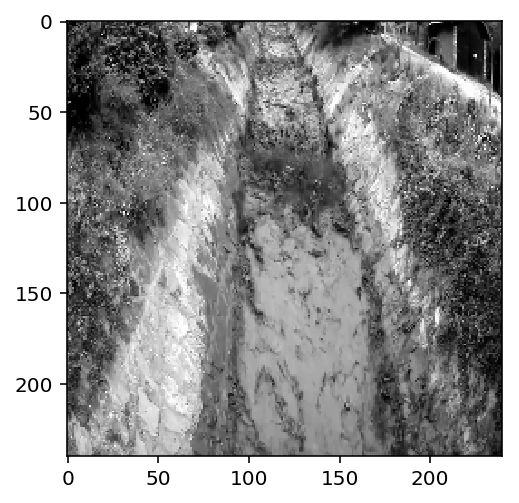

In [49]:
plt.imshow(ImageDataset[80,:,:], cmap='gray')
plt.show()

In [50]:
ImageDataset = ImageDataset - np.mean(ImageDataset, axis=0)

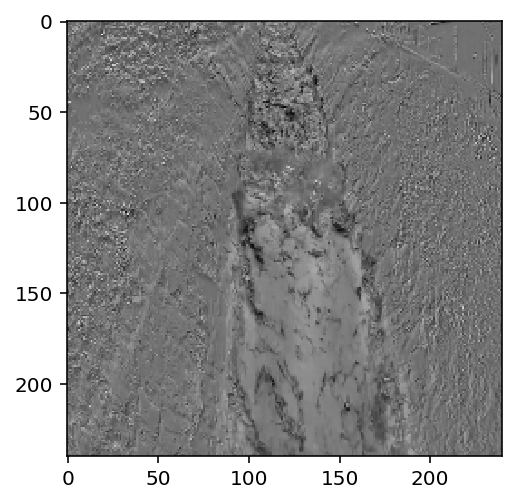

In [51]:
plt.imshow(ImageDataset[80,:,:], cmap='gray')
plt.show()